Starting with importing the required libraries

In [5]:
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

The dataset used here is Admission_Predict.csv. We are predicting the chance of admission(y) based on the dependent variables(x), GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA and Research

In [8]:
data_set=pd.read_csv('Admission_Predict.csv')
data_set.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data_set.shape

(400, 9)

In [10]:
data_set.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [12]:
x=data_set.iloc[:,-8:-1]
y=data_set.iloc[:,8]

Splitting the dataset into training(70%) and testing(30%) data

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

Fitting the dataset into linear regression model

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Calculating co-efficients

In [15]:
regressor.coef_

array([ 0.00186803,  0.0022731 ,  0.00270635, -0.0030745 ,  0.02071688,
        0.13025483,  0.02269622])

Predicting

In [16]:
y_pred= regressor.predict(x_test) 
y_pred

array([0.69175175, 0.69339461, 0.77820827, 0.61977251, 0.72309583,
       0.60352877, 0.70914747, 0.63880871, 0.87997331, 0.9201355 ,
       0.54173131, 0.88007021, 0.71400929, 0.45711411, 0.85266316,
       0.62476582, 0.63345967, 0.8200097 , 0.5835731 , 0.73447013,
       0.87672094, 0.84440339, 0.65736736, 0.45318512, 0.78323306,
       0.58193833, 0.49691549, 0.64109606, 0.88377962, 0.6533297 ,
       0.63818259, 0.73843136, 0.74089879, 0.55903223, 0.78173734,
       0.77059112, 0.6508724 , 0.86252923, 0.62918858, 0.93287858,
       0.7248404 , 0.67317809, 0.705548  , 0.80386692, 0.83180368,
       0.65058351, 0.56020385, 0.69110605, 0.60948953, 0.60217666,
       0.67774976, 0.8057683 , 0.65105075, 0.87403557, 0.72365635,
       0.75395468, 0.69860812, 0.73071454, 0.75331522, 0.82618218,
       0.77485152, 0.47505564, 0.63709077, 0.52209386, 0.83621102,
       0.82403099, 0.73937732, 0.86457347, 0.76943623, 0.75229363,
       0.59859976, 0.82452534, 0.83126658, 0.6036793 , 0.93113

In [17]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.8221063439698572
Test Score:  0.7456624883029341


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.004377217459382589

Feature selection using correlation

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [21]:
f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000002A632677310>)

In [22]:
# transform train input data
x_train_fs = f_selector.transform(x_train)
# transform test input data
x_test_fs = f_selector.transform(x_test)

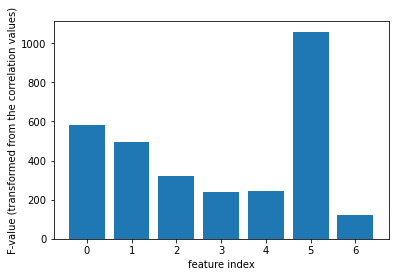

In [24]:
# Plotting the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()